## Problem Statement
- Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, 
their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. 
This feature estimates the chances of graduate admission from an Indian perspective.
- We'll use different ML techniques to find out how different factors impact a person's probablity of getting into IVY League College.
- We'll use a linear regression model to see what are the chances of a student to get admission based on his/her scores on different criterias. 

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [106]:
df = pd.read_csv('Jamboree_Admission.csv')

In [107]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [109]:
df.shape

(500, 9)

In [110]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [111]:
df.rename(columns = {'LOR ':'LOR','Chance of Admit ':'Chance of Admit'},inplace=True)

In [112]:
df.drop('Serial No.',axis=1,inplace=True)

### Univariate Analysis

In [113]:
def plot_univariate(column):
    fig, ax =plt.subplots(1,2,figsize=(20,5))
    sns.boxplot(x=df[column],ax=ax[0])
    sns.kdeplot(x=df[column],ax=ax[1])
    plt.show()

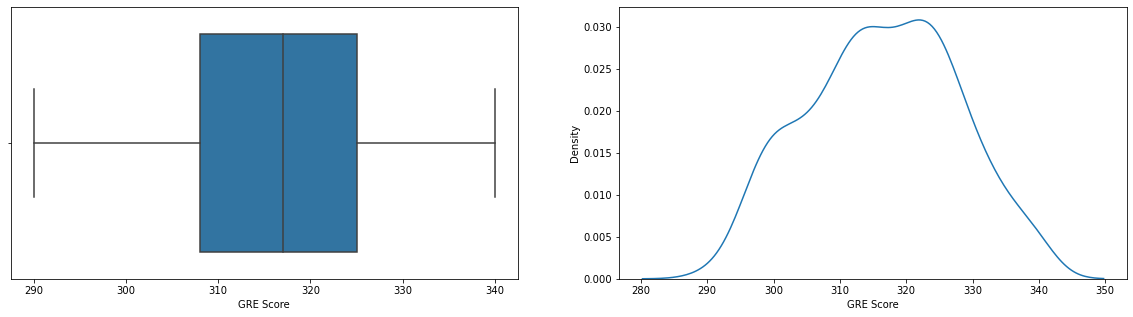

In [114]:
plot_univariate('GRE Score')

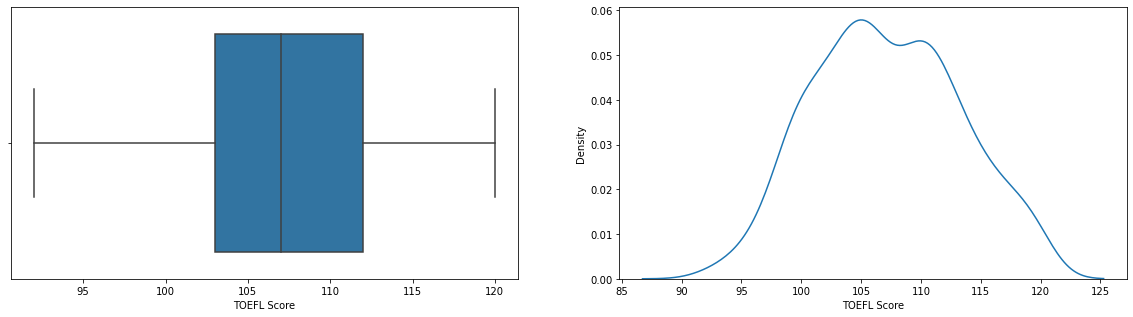

In [115]:
plot_univariate('TOEFL Score')

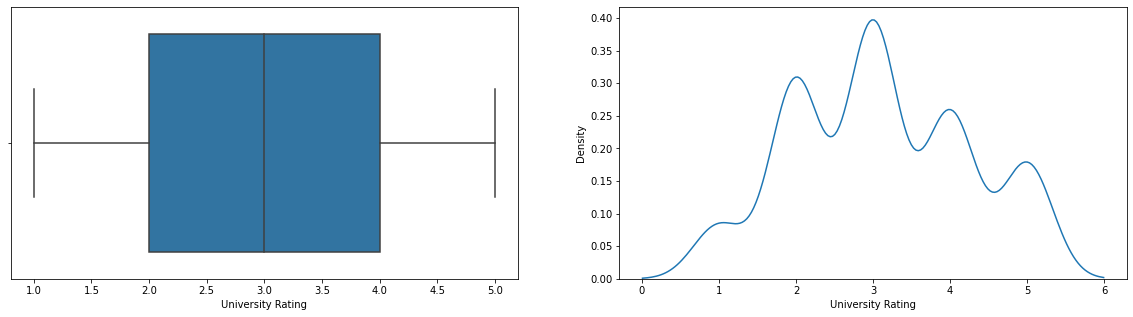

In [116]:
plot_univariate('University Rating')

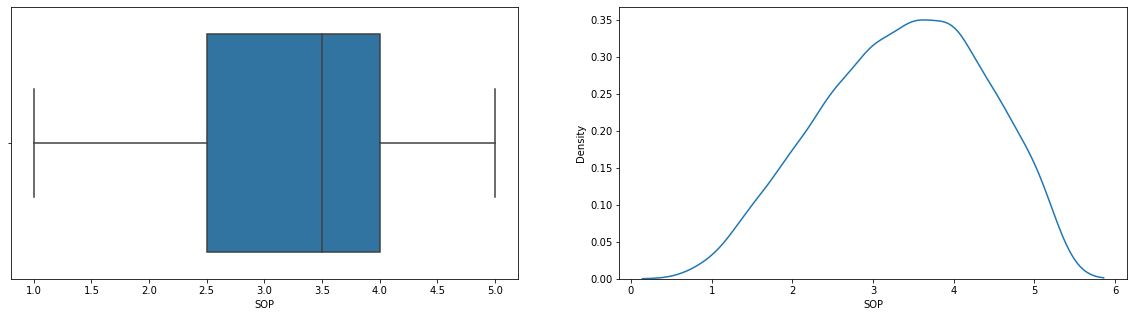

In [117]:
plot_univariate('SOP')

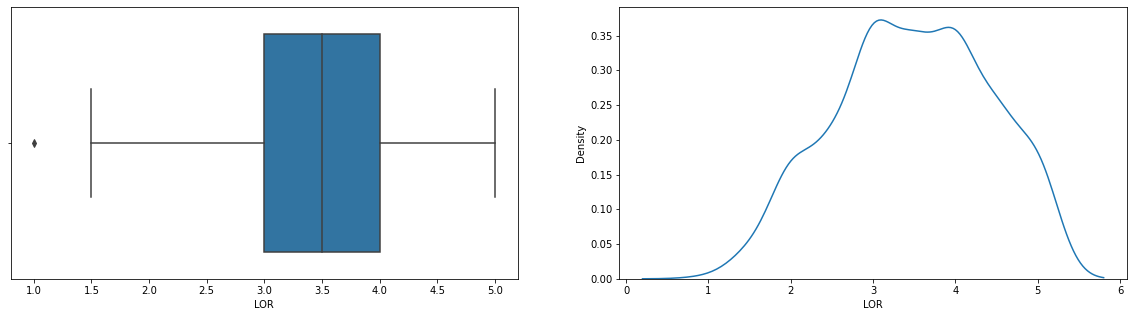

In [118]:
plot_univariate('LOR')

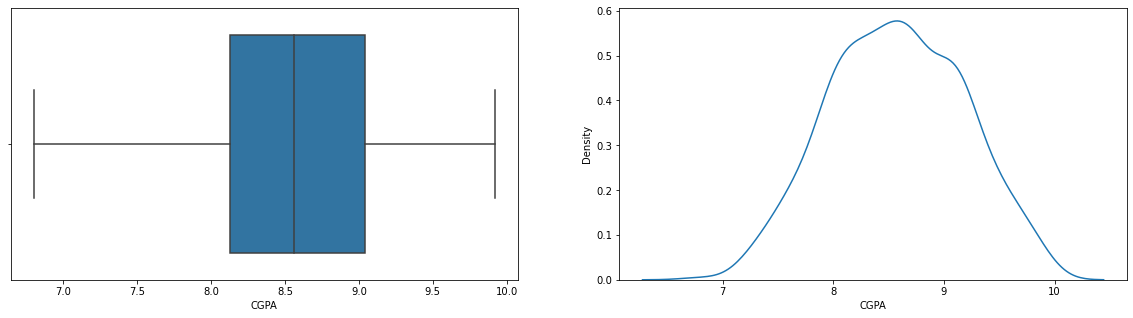

In [119]:
plot_univariate('CGPA')

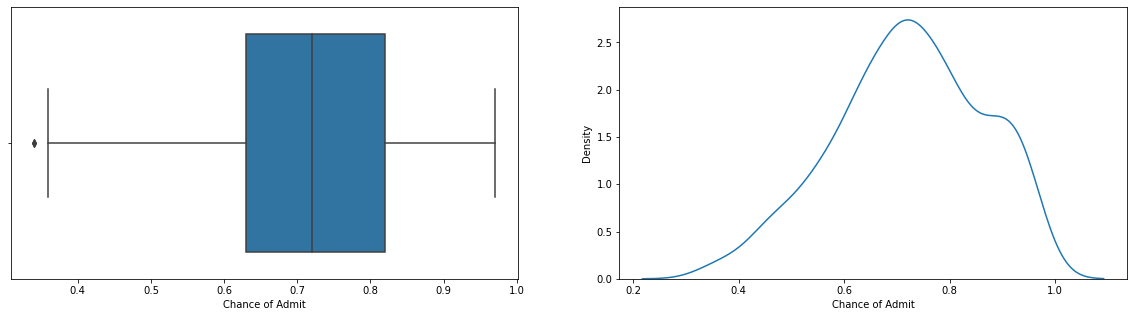

In [120]:
plot_univariate('Chance of Admit')

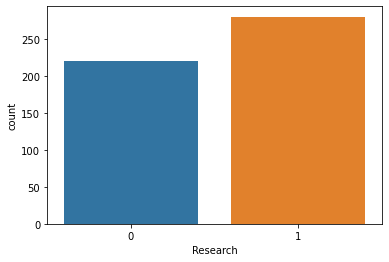

In [121]:
sns.countplot(x = df['Research'])
plt.show()

## Bivariate Analysis

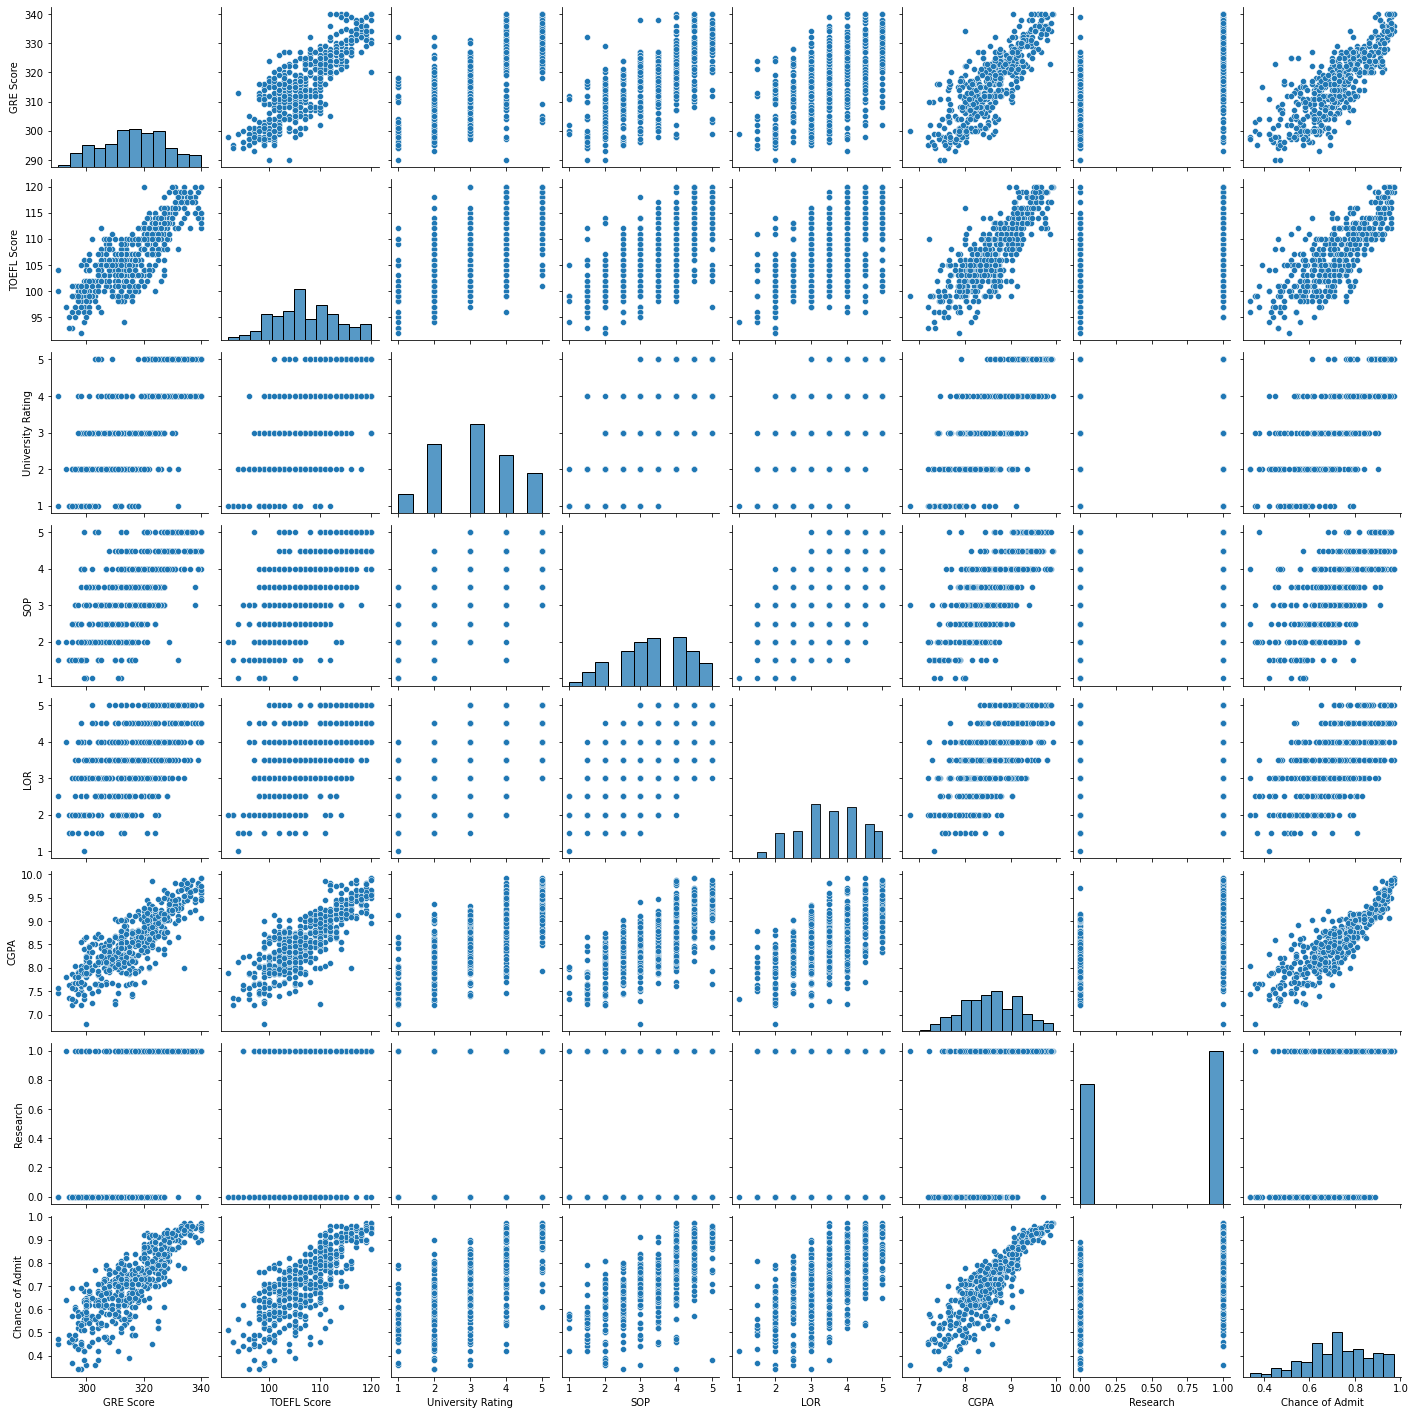

In [122]:
sns.pairplot(df)
plt.show()

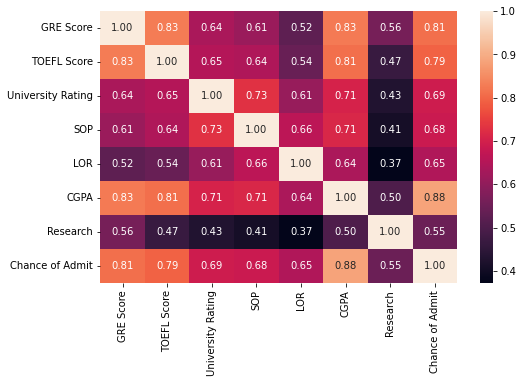

In [137]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

<div class="alert alert-block alert-info">
<b>Insights based on EDA:</b> From the above univariate and bivariate Analysis we can infer the following.</br>
    - There are no missing values and outliers in the dataset.</br>
    - GRE Score, TOEFL Score and CGPA score are highly positively correlated to chance of Admit.</br>
    - GRE Score and TOEFL Score are highly correlated.</br>
    - CGPA, TOEFL and GRE Score are highly intercorrelated.</br>
    - There is not much impact of Research on chance of Admit.</br>
    - LOR and SOP can have an impact on Chance of Admit but they don't play very crucial role.</br>
    - There are no outliers in the dataset since all the values have an upper limit and a lower limit like GRE Score, TOEFL Score,LOR, SOP, University Rating etc.
</div>

In [123]:
df.duplicated().sum()

0

In [124]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [125]:
y = df['Chance of Admit']
X = df.drop(['Chance of Admit'],axis=1)

In [128]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [129]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [132]:
print("shape of X train is: {}".format(X_train.shape))
print("shape of X test is: {}".format(X_test.shape))
print("shape of y train is: {}".format(y_train.shape))
print("shape of y_test is: {}".format(y_test.shape))

shape of X train is: (400, 7)
shape of X test is: (100, 7)
shape of y train is: (400,)
shape of y_test is: (100,)


In [162]:
scaler = StandardScaler()
model = LinearRegression()

scaled = scaler.fit(X_train)
X_train_scaled = scaled.transform(X_train)
X_test_scaled = scaled.transform(X_test)

model.fit(X_train_scaled,y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Test data r2_score: {}".format(r2_score(y_test,y_test_pred)))
print("Train data r2 score {}".format(r2_score(y_train,y_train_pred)))


Test data r2_score: 0.8208741703103731
Train data r2 score 0.8215099192361265


In [161]:
feature_names = X_train.columns

coefs = pd.DataFrame(
    model.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
GRE Score,0.020910
TOEFL Score,0.019658
University Rating,0.007011
SOP,0.003049
LOR,0.013528
CGPA,0.070693
Research,0.009890


In [170]:
ridge_model = Ridge(alpha=5)
ridge_model.fit(X_train_scaled,y_train)
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

print("Test data r2_score: {}".format(r2_score(y_test,y_test_pred_ridge)))
print("Train data r2 score {}".format(r2_score(y_train,y_train_pred_ridge)))


Test data r2_score: 0.8202931046792501
Train data r2 score 0.8214073027417684


In [172]:
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train_scaled,y_train)
y_train_pred_lasso = ridge_model.predict(X_train_scaled)
y_test_pred_lasso = ridge_model.predict(X_test_scaled)

print("Test data r2_score: {}".format(r2_score(y_test,y_test_pred_lasso)))
print("Train data r2 score {}".format(r2_score(y_train,y_train_pred_lasso)))


Test data r2_score: 0.8202931046792501
Train data r2 score 0.8214073027417684


### checking Multicollinearity

In [78]:
y = df['Chance of Admit']
X = df.drop('Chance of Admit',axis=1)

In [79]:
def check_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    print(vif_data)

In [80]:
check_vif(X)

             feature          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4                LOR    30.911476
5               CGPA   950.817985
6           Research     2.869493


In [81]:
X.drop(['TOEFL Score','University Rating','SOP','LOR','CGPA'],axis=1,inplace=True)

In [82]:
X

,GRE Score,Research
0,337,1
1,324,1
2,316,1
3,322,1
4,314,0
...,...,...
495,332,1
496,337,1
497,330,1
498,312,0


In [83]:
check_vif(X)

     feature       VIF
0  GRE Score  2.377465
1   Research  2.377465
